# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
print("X_train:\t{}".format(len(X_train)))
print("y_train:\t{}".format(len(y_train)))
print("X_test:\t\t{}".format(len(X_test)))
print("y_test:\t\t{}".format(len(y_test)))
print("Image Shape:\t{}".format(X_train[0].shape))

X_train:	39209
y_train:	39209
X_test:		12630
y_test:		12630
Image Shape:	(32, 32, 3)


In [3]:
print("Unique labels in y_train:\t{}".format(len(set(y_train))))

Unique labels in y_train:	43


In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32, 32, 3)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [6]:
def plot_imgs(imgs):
    fig, axes = plt.subplots(5,8)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        if(i< len(imgs)):
            ax.imshow(imgs[i])
            ax.set_xticks([])
            ax.set_yticks([])


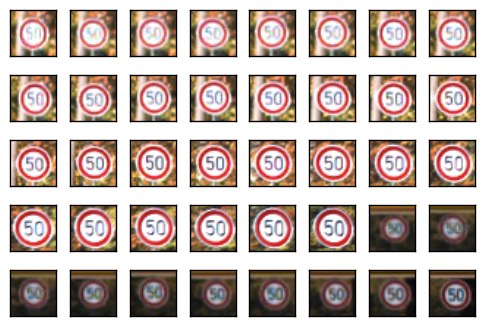

In [7]:
some_images = X_train[3000:3040] # some arbitrary list of 40 images form training set
plot_imgs(some_images) #looks like alot of these images are the same image but altered in some fashion.
#maybe by doing this, blurring or shifting location, one can 'create' new images from existing

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

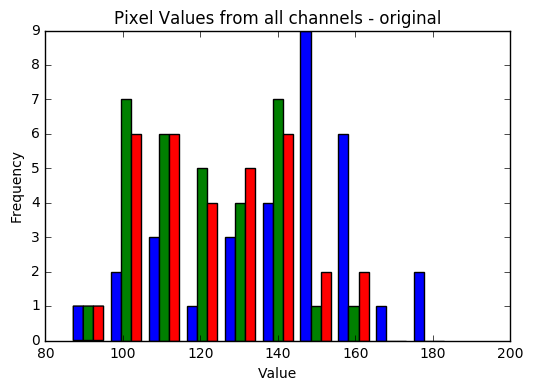

In [8]:
import matplotlib.pyplot as plt

sample1 = X_train.mean(2)
#print(sample1[0])
plt.hist(sample1[0])
plt.title("Pixel Values from all channels - original")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [9]:
import tensorflow as tf
from sklearn.utils import shuffle
import numpy as np
from sklearn import preprocessing

In [10]:
#Shuffle the training set
X_train, y_train = shuffle(X_train, y_train)

In [11]:
X_train  = (X_train.astype(float)) - 128


X_test = (X_test.astype(float)) - 128


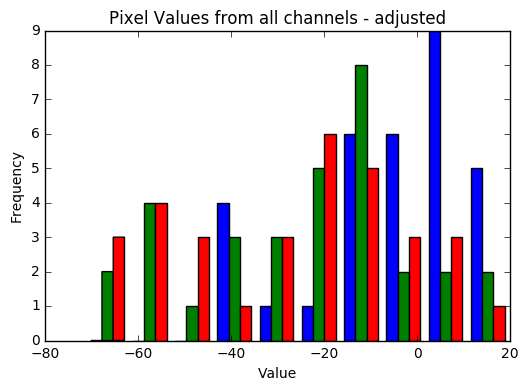

In [12]:
sample1 = X_train.mean(2)
#print(sample1[0])
plt.hist(sample1[0])
plt.title("Pixel Values from all channels - adjusted")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [13]:
X_train = np.reshape(X_train, (-1, 3072))
X_test = np.reshape(X_test, (-1, 3072))

X_train = X_train/128#preprocessing.scale(X_train)
X_test = X_test/128#preprocessing.scale(X_test)

In [14]:
X_train = np.reshape(X_train, (-1, 32,32,3))
X_test = np.reshape(X_test, (-1, 32,32,3))


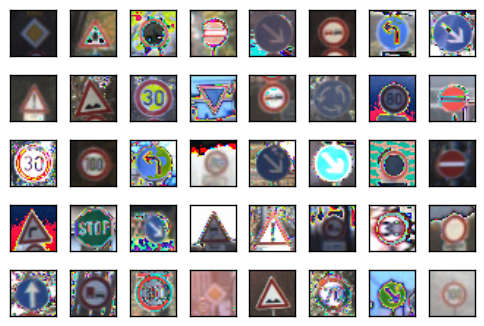

In [15]:
#After some preprocessing and shuffling. The images become almost undecypherable by human eyes. Have a look. 
some_images = X_train[3000:3040] # some arbitrary list of 40 images form training set
plot_imgs(some_images)




### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** First I shuffled the data so we dont have any inherited bias just based on how the data is ordered given to us originally. Secondly we know that pixel values in an image range from 0 - 255 so we would expect that the mean is somewhere around 128. But it is computational beneficial to have a zero mean so I subtracted 128 from all values. This got the mean much close to 0. Doing this actually increased the performance of the model by .5 accuracy. Another oepration I performed was to close the distribution of the - 128 to + 128 closer to 0 so I divided all values by 128. This got all pixel values to close to a zero mean while scaling down the values close to 0. 



I came back and created a graph of how much each class was represented below. Looks like the speed signs that are in the beginning appear quite healthy in the dataset. However other classes, such as the "dangerous curve" signs do not have nearly sa much samples. Some faux data can some in handy here. 

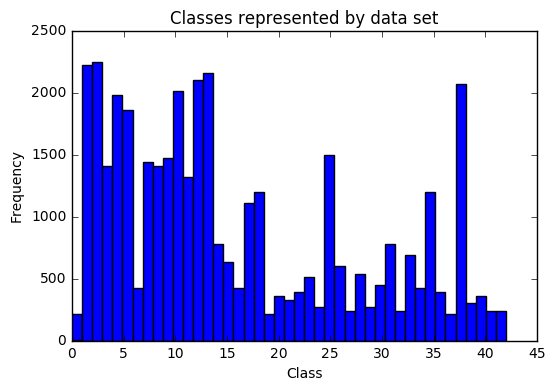

In [16]:
plt.hist(y_train,43)
plt.title("Classes represented by data set")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** We are given a test set so I reserved this set for testing. As for validation, during each epoch I set aside roughly 10% of the test set after reshuffling the data for that epoch. I did not generate new data. 

If I were to generate new data, first I would visualize how evenly the distribution of the classes were in our given test set. Most likely I would find that there would be some under-represented classes within the set compared to the rest of the classes,. In order to compensate for these classes, I can duplicate some of the images of that class and apply some transformations or filters to them. For instance blurring, skewing or light/shadow effects on the images. Then I would add these new faux images to the data set.

In [17]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [18]:
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)

def traffic_sign_cnn(x):    
    # Hyperparameters
    mu = 0.0
    sigma = 0.1
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    conv1 = tf.nn.relu(conv1)

    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)


    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

 
    fc0   = flatten(conv2)
    

    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 150), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(150))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
 
    fc1    = tf.nn.relu(fc1)
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

   
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(150, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1_drop, fc2_W) + fc2_b
    

    fc2    = tf.nn.relu(fc2)

    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I used a convolutional neural network for this model. 

There was 2 hidden layers, 2 fully connected layer and an output layer

For each hidden layer I used a relu activation step. I also considered tanh and sigmoid. I fir each hidde I also used a max pool step with values to decrease the input dimensions by half. 

On the first fully connected layer also used a relu activation layer but I also used a dropout function as well to give my model some rigidness to help avoid overfitting. 

The last fully connected layer I dropped the output shape to the number of classes so we can validate against our known labels. 

The numbers look like this


Input: 32 x 32 x 3

H1: 28x28x12 -> Pool -> 14x14x12

H2: 10x10x24 -> Pool -> 5x5x24

Flatten: -> (5x5x24) -> 600

FC1:600->150

FC2:150->43  (43 mapped classes, if we apply one-hot to these 43 out values, we get our prediction)

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, n_classes)

In [20]:
rate = 0.001

logits = traffic_sign_cnn(x)
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
#change to overloaded softmax function that handles onehot encoders internally
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [22]:
print("Starting TF Session")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        X_validation = X_train[0:3000]
        y_validation = y_train[0:3000]

        X_trainb = X_train[3001:]
        y_trainb = y_train[3001:]
        num_examples = len(X_trainb)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_trainb[offset:end], y_trainb[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.6})
      
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic-sign')
    print("Model saved")

Starting TF Session
Training...

EPOCH 1 ...
Validation Accuracy = 0.886

EPOCH 2 ...
Validation Accuracy = 0.943

EPOCH 3 ...
Validation Accuracy = 0.970

EPOCH 4 ...
Validation Accuracy = 0.975

EPOCH 5 ...
Validation Accuracy = 0.985

EPOCH 6 ...
Validation Accuracy = 0.988

EPOCH 7 ...
Validation Accuracy = 0.994

EPOCH 8 ...
Validation Accuracy = 0.993

EPOCH 9 ...
Validation Accuracy = 0.994

EPOCH 10 ...
Validation Accuracy = 0.997

Model saved


In [23]:
print(X_test.shape)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

(12630, 32, 32, 3)
Test Accuracy = 0.950


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Our model training gets piped through a number of operations. First our data set is a bit too large to get trained at all once so we will batch our data into smaller more manageable chunks. We will run all of our batches to completeness for a total of 10 epochs, 

Within epoch, we will reshuffle our data because will extract out roughly 1/10th of it as our validation set for the currenct epoch instance. We use a batch size of 128 for each batch we run through the session at a time unti the entire data set has been exhausted. Repeat for all epochs. 

For each batch, the data gets piped through the training pipeline which consists of:

Our model CNN that we created and described above. - This is where the weights of the training are getting manipulated.

After which we apply the results to a cost function, here we are using a function to measure the cross entropy regarding the softmax of the logits. Basically this will determine just how erroneaous our predictions are with compared to the actual labels Originally I also used a one-hot encoder function as well, but I changed the TF cost function to another one that handles this internally. Next we pump the results of the cross entropy function to a reduce-mean function which takes the average of the error from the previous step. We label this chain as our loss function. 

We provide this loss function to an AdamOptimizer. The AdamOptimzer it a relative to schotastic gradient descent with plenty of efficient upgrades, one being having a dynamic momentum rate. We also set our learning rate for this optimizer to 0.001. (I played this this number adjusting up and down and 0.001 gave the best results)

This optimizer is what we feed our tensorflow session. As out session is running, the weight placeholder variables and bias variables will be manipulated by the optimizer we created. We also provide the tensorflow session our features (images that we adjusted) and labels. We also provide a keep probability for the dropout layer to added to our first fully connected layer in our CNN model. 

While checking for accuracy, we compute the results from our model in one-hot encoded form (and argmaxed to get the index value as our label) we compare it to the numerical label that we know is the truth. We compare these to get a percentage in accuracy. 

Another thing to note here is when evaluating accuracy, we bump up the keep probability to 100% so our model will use all nodes in determining predictions outside of training. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** My solution is influenced by the lenet acrhitecture shown in the lectures with a few changes. First I increased the amount of new depth. Our images our starting out with a depth of 3 layers already so instead of 6, i Increased this to 12. The thinking behind this is that maybe the CNN can find separate patterns in the different color channels independantly and I wanted the model to have enough flexibility to do so.

Another thing I added was the dropout layer. From the lectures I learned that dropout can increase the defense of the model against overfitting, and in my own experience in this very project I witnessed the performance increase. 

For each epoch I also reshuffled all data as well as extract out a separate validation set for each epoch. 

I also wanted to experiment with other types of activation layers such as the tanh and sigmoid. However I returned to relu as it gave the best performance. 

I chose the lenet model as a base model because it looked to do something very similar to what our target was. IN the data preparation I also added a couple operations to adjust the mean and the scale of the pixel values. I tried many different scaling operations including normalization functions built into the tensorflow library, however simppy just dividing all pixels by 128 yeilded the best results. 


Accuracy score from test data set is 95%, some runs have acheived up to 97%

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [24]:
import os
from scipy import ndimage, misc
import re
#adapted from a stack overflow answer with some alterations. This function will load a directory of images, resize them then return the
#matrix of pixels
def get_new_images():
    images = []
    for root, dirnames, filenames in os.walk("new_images/"):
        for filename in filenames:
            if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
                filepath = os.path.join(root, filename)
                image = ndimage.imread(filepath, mode="RGB")
                image_resized = misc.imresize(image, (32, 32))
                images.append(image_resized)
    return np.array(images)

(6, 32, 32, 3)


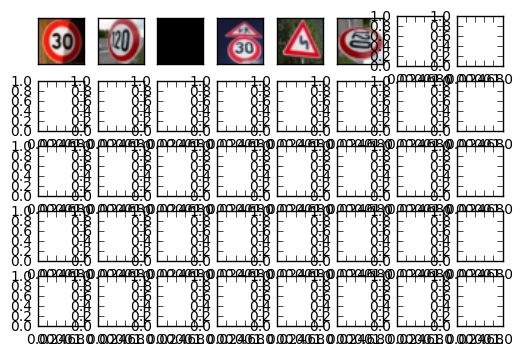

In [25]:
new_images = get_new_images()
print(new_images.shape)
plot_imgs(new_images)

In [26]:
pred_images = (new_images.astype(float)) - 128
pred_images = np.reshape(pred_images, (-1, 3072))


pred_images = pred_images/128#preprocessing.scale(pred_images)
pred_images = np.reshape(pred_images, (-1, 32,32,3))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I found some images online of german traffic signs. I also threw in a completely black image to view the certainty of the model of static data. I also included an image with two signs to see what the model would do as well as flip a sign upside down. I have plotted the signs above for reference. 6 images in total including the black image. The 30 speed sign also has some shading on it, this is to see if there is some uncertainty caused by shading.

In [35]:
result = None
def eval_from_saved_model():
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        pred = tf.nn.softmax(logits)
        topPred=tf.nn.top_k(pred, k=3, sorted=True, name=None)
        result = sess.run(topPred, feed_dict={x: pred_images,keep_prob: 1.0})
        print(result)
    
    

In [36]:
eval_from_saved_model()

TopKV2(values=array([[  1.00000000e+00,   1.21096912e-16,   3.29641219e-19],
       [  8.95921290e-01,   1.00044847e-01,   3.03496979e-03],
       [  2.93593615e-01,   1.75839335e-01,   1.53117195e-01],
       [  9.93095815e-01,   6.89923484e-03,   2.45384831e-06],
       [  9.11723375e-01,   4.82294224e-02,   3.74183916e-02],
       [  6.74763143e-01,   2.38157049e-01,   8.10307041e-02]], dtype=float32), indices=array([[ 1,  0,  4],
       [ 1,  0,  2],
       [20, 30, 40],
       [26, 18, 33],
       [31, 19, 24],
       [31,  3,  5]], dtype=int32))


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** I output the top probabilities above which I will use to answer this question along with question 8. From the output of the model and computing the one-hot myself, the predictions of the model are:

Image 1: Actual is class 1, predicted is class 1.

Image 2: Actual is class 8 predicted is class 1. This can probably be because the image itself is skewed a bit and we are looking at the sign from an angle. This means that just because the sign was at an angle, we would think a 120 km sign was a 30 km sign. We can certainly improve, probably my adding skewed faux data to our data set.

Image 3: Actual is no class, nothing. Predicted it class 20 - "Dangerous curve to the right". however if we look at the probabilities. This was only the top probability of very low probabilities. This is a good sign. Even though class 20 got the highest probability, it was still only a below 30% probabable.

Image 4: Actual is either 1 or 27. Predicted was 26, "Traffic Signals". Now this was kind of unfair on my part as I tried to throw two at once. But it is interesting that is predicted "Traffic Signals" because traffic signals are stacked, much like the signs in the image. Interesting. 

Image 5: Actual is not defined, I believe it is a road bend. The model predicted animal crossing which looks very similar, here is an image of it. http://www.symbols.com/gi.php?type=1&id=942&i=1 I think I am going to mark this as a correct prediction because the model hasnt seen the test image before. 

Image 6: Actual is speed 120km by transforms rotated. Predicted animal crossing. Again we can probably overcome tranformed, bended or skewed images bu introducing faux images. In the real-world, we also cannot assume that all signs will be perfectly facing our camera. 


I will take Image 1 and 5 as good predictions out of 5 (not including the black one) for a 40% accuracy for new images. This is also pretty unfair to the model as well because I cheated and threw some pretty tweaked images at it. Room for improvement on the model. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

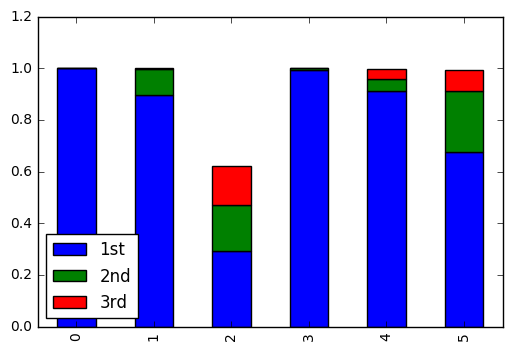

In [43]:
import pandas as pd
data1 = [1.00000000e+00,8.95921290e-01,2.93593615e-01,9.93095815e-01,9.11723375e-01,6.74763143e-01]
data2 = [1.21096912e-16,1.00044847e-01,1.75839335e-01,6.89923484e-03,4.82294224e-02,2.38157049e-01]
data3 = [3.29641219e-19,3.03496979e-03,1.53117195e-01,2.45384831e-06,3.74183916e-02,8.10307041e-02]
df=pd.DataFrame({'1st':data1, '2nd':data2, '3rd':data3})
df.plot(kind='bar', stacked=True)

**Answer:** Above are the softmax certainties from our model that we trained. These are only showing the top 3 probabilities. The order in the graph correlates to the order of the test images plotted above. The model looks to be very very certain for image one to the extend that we cant even see the probabilities of the 2nd two top softmaxes. Same with 3. The bar labeled 2 in the chart above is the all black image and it makes sense that it is very uncertain. Also also if we took more than jus the top 3 softmax, we can see even more top probability contenders. For the rest of the test images, the top 3 probabilities summed together become incredibly close to 1.0 (100% probable or confident)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.